In [1]:
# Import our dependencies
import pandas as pd
import sklearn as skl


# Read in our ramen data
charity_df = pd.read_csv("charity_data.csv")
# Read in our ramen data
charity_df
# # Print out the Country value counts
# country_counts = ramen_df.Country.value_counts()
# country_counts

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [2]:
charity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [6]:
# charity_df.hvplot(kind="table")

In [4]:
# coins_name_df = pd.DataFrame(df_crypto["CoinName"])
# coins_name_df.head()

charity_names_df = pd.DataFrame(charity_df[["NAME","EIN"]])
charity_names_df.head()

,NAME,EIN
0,BLUE KNIGHTS MOTORCYCLE CLUB,10520599
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,10531628
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,10547893
3,SOUTHSIDE ATHLETIC ASSOCIATION,10553066
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,10556103


In [2]:
drop_list= list(charity_df[["NAME","EIN","SPECIAL_CONSIDERATIONS"]])
drop_list

['NAME', 'EIN', 'SPECIAL_CONSIDERATIONS']

In [6]:
print(type(drop_list))

<class 'list'>


In [3]:
## drop name column as not needed 

charity_df = charity_df.drop(drop_list,axis=1)
charity_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1


# no longer using EIN as index to keep original index to be able to merge later

In [4]:
# charity_df = charity_df.set_index("EIN")
# charity_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
EIN,,,,,,,,,,
10520599,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
10531628,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
10547893,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
10553066,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
10556103,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# #remove ein name from index to be used for all df needed to be split or recreated 

# charity_df.index.name = None
# charity_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
10520599,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
10531628,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
10547893,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
10553066,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
10556103,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
unq_consid = charity_df["SPECIAL_CONSIDERATIONS"].unique()
unq_consid

In [4]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

In [6]:
charity_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [7]:
# attrition_df[attrition_cat].nunique()
#check # of unq val in each column 
charity_df[charity_cat].nunique()

APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION      71
USE_CASE             5
ORGANIZATION         4
INCOME_AMT           9
dtype: int64

In [ ]:
# droped name column , need to pick what to do with application type and classification 
#check unique in each column and choose to set other or not 

In [8]:
## finding how many nulls are in there to be able to drop those rows 
for column in charity_df.columns:
    print(f"column {column} has {charity_df[column].isnull().sum()} null values")

column APPLICATION_TYPE has 0 null values
column AFFILIATION has 0 null values
column CLASSIFICATION has 0 null values
column USE_CASE has 0 null values
column ORGANIZATION has 0 null values
column STATUS has 0 null values
column INCOME_AMT has 0 null values
column ASK_AMT has 0 null values
column IS_SUCCESSFUL has 0 null values


In [ ]:
# start binning application types down to top ten 


In [10]:
charity_df['APPLICATION_TYPE'].unique()

array(['T10', 'T3', 'T5', 'T7', 'T4', 'T6', 'T2', 'T9', 'T19', 'T8',
       'T13', 'T12', 'T29', 'T25', 'T14', 'T17', 'T15'], dtype=object)

In [5]:
counts_app_type = charity_df['APPLICATION_TYPE'].value_counts()
counts_app_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

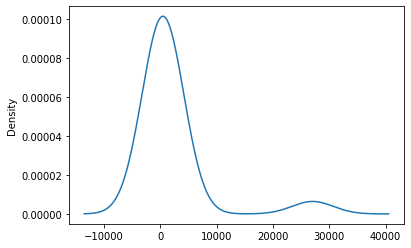

In [12]:
counts_app_type.plot.density()

In [6]:

replace_app_typ = list(counts_app_type[counts_app_type <100].index)
replace_app_typ

['T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [14]:
len(replace_app_typ)

8

In [7]:
# # from t9 and up there are 9 major types of applications so I will set other for those 
# for alg in replace_alg:
#     df_crypto.Algorithm = df_crypto.Algorithm.replace(alg,"Other")

for typ in replace_app_typ:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(typ,"T_Other")

In [8]:
counts_app_type = charity_df['APPLICATION_TYPE'].value_counts()
counts_app_type

T3         27037
T4          1542
T6          1216
T5          1173
T19         1065
T8           737
T7           725
T10          528
T9           156
T_Other      120
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# complete binning of application type 
# start binning of classification 

In [62]:
charity_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
10520599,T_Other,Independent,C1000,ProductDev,Association,1,0,N,5000,1
10531628,T_Other,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
10547893,T_Other,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
10553066,T_Other,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
10556103,T_Other,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [9]:
counts_classif_type = charity_df['CLASSIFICATION'].value_counts()
counts_classif_type.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [10]:
replace_classif_typ = list(counts_classif_type[counts_classif_type <180].index)
replace_classif_typ

['C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1278',
 'C1238',
 'C1237',
 'C1235',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1600',
 'C1257',
 'C0',
 'C1260',
 'C2710',
 'C1234',
 'C1246',
 'C1256',
 'C3200',
 'C1267',
 'C4500',
 'C2170',
 'C2600',
 'C1732',
 'C4120',
 'C2570',
 'C3700',
 'C2500',
 'C1580',
 'C2561',
 'C8210',
 'C1248',
 'C1370',
 'C1900',
 'C1820',
 'C5200',
 'C2150',
 'C1245',
 'C4200',
 'C1236',
 'C1283',
 'C1570',
 'C6100',
 'C1728',
 'C2380',
 'C2190']

In [19]:
len(replace_classif_typ)

63

In [11]:
# for typ in replace_app_typ:
#     charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(typ,"T_Other")
    
for cls in replace_classif_typ:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(cls,"C_Other")

In [12]:
counts_classif_type = charity_df['CLASSIFICATION'].value_counts()
counts_classif_type.head(12)

C1000      17326
C2000       6074
C1200       4837
C3000       1918
C2100       1883
C_Other     1003
C7000        777
C1700        287
C4000        194
Name: CLASSIFICATION, dtype: int64

# completed binning of coloumns 


In [13]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()
charity_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [19]:
# attrition_df[attrition_cat].nunique()
#check # of unq val in each column 
charity_df[charity_cat].nunique()

APPLICATION_TYPE    10
AFFILIATION          6
CLASSIFICATION       9
USE_CASE             5
ORGANIZATION         4
INCOME_AMT           9
dtype: int64

# start one hot encoding 

In [14]:
# Create a OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,APPLICATION_TYPE_T_Other,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
len(encode_df)

34299

In [15]:
# # Merge one-hot encoded features and drop the originals
# attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
# attrition_df = attrition_df.drop(attrition_cat,1)
# attrition_df.head()

# Merge one-hot encoded features and drop the originals
charity_df = charity_df.merge(encode_df,left_index=True, right_index=True)
charity_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
charity_df = charity_df.drop(charity_cat,1)
charity_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn.model_selection import train_test_split
# # Split our preprocessed data into our features and target arrays
# y = attrition_df["Attrition_Yes"].values
# X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

y = charity_df["IS_SUCCESSFUL"].values
X = charity_df.drop(["IS_SUCCESSFUL"],1).values

# # Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [18]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
len(X_train[0])

45

In [34]:
X_train[0]

array([1.e+00, 5.e+03, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+00,
       0.e+00, 0.e+00, 0.e+00, 1.e+00, 1.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e+00, 0.e+00])

# inital attempt with 1 layer of 8 nodes 48 inputs which created 393 params (probably to many ? )

In [29]:
import tensorflow as tf

# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
# hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

## only one layer intially ran 
# # Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 368       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 6s 251us/sample - loss: 0.6277 - accuracy: 0.6843
Epoch 2/50
25724/25724 [==============================] - 3s 122us/sample - loss: 0.5709 - accuracy: 0.7234
Epoch 3/50
25724/25724 [==============================] - 4s 142us/sample - loss: 0.5637 - accuracy: 0.7268
Epoch 4/50
25724/25724 [==============================] - 4s 146us/sample - loss: 0.5601 - accuracy: 0.7278
Epoch 5/50
25724/25724 [==============================] - 3s 119us/sample - loss: 0.5577 - accuracy: 0.7275
Epoch 6/50
25724/25724 [==============================] - 4s 158us/sample - loss: 0.5560 - accuracy: 0.7289
Epoch 7/50
25724/25724 [==============================] - 4s 144us/sample - loss: 0.5551 - accuracy: 0.7286
Epoch 8/50
25724/25724 [==============================] - 3s 122us/sample - loss: 0.5542 - accuracy: 0.7303
Epoch 9/50
25724/25724 [==============================] - 5s 196us/sample - loss: 0.5533 - accuracy: 0.7300
Epoch

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 70271.0695 - accuracy: 0.5332
Loss: 118309.41044104751, Accuracy: 0.5331778526306152


# when comparing to the x_test low accuracy when comparing the X_test_scaled got 72 percent accuracy and fractional loss not hundred thousand. 

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5475 - accuracy: 0.7235
Loss: 0.5533169669868647, Accuracy: 0.723498523235321


In [46]:
# initial loss 218701 so thats not good. accuracy is just above 50 % so pretty bad also 

# initial run taking 2 seconds per epoch and loss is going down super slowly , probably cut down on 
# the number of inputs and the number of neurons 
# maybe what would optimal number of imputs be, do I need one for each row ? 

In [23]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 368       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 4s 175us/sample - loss: 0.6247 - accuracy: 0.6757
Epoch 2/50
25724/25724 [==============================] - 5s 182us/sample - loss: 0.5648 - accuracy: 0.7265
Epoch 3/50
25724/25724 [==============================] - 5s 211us/sample - loss: 0.5573 - accuracy: 0.7294
Epoch 4/50
25724/25724 [==============================] - 4s 157us/sample - loss: 0.5545 - accuracy: 0.7299
Epoch 5/50
25724/25724 [==============================] - 3s 127us/sample - loss: 0.5531 - accuracy: 0.7307
Epoch 6/50
25724/25724 [==============================] - 5s 190us/sample - loss: 0.5513 - accuracy: 0.7314
Epoch 7/50
25724/25724 [==============================] - 5s 188us/sample - loss: 0.5507 - accuracy: 0.7308
Epoch 8/50
25724/25724 [==============================] - 5s 178us/sample - loss: 0.5500 - accuracy: 0.7309
Epoch 9/50
25724/25724 [==============================] - 4s 139us/sample - loss: 0.5494 - accuracy: 0.7309
Epoch

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 2s - loss: 39241.9942 - accuracy: 0.5332
Loss: 66067.91706871812, Accuracy: 0.5331778526306152


In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5524 - accuracy: 0.7242
Loss: 0.5527355304403834, Accuracy: 0.7241982221603394


# to try to optimize I will doulbe the nodes in both layers to get closer to 75 % 

In [34]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 16

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                736       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 4s 149us/sample - loss: 0.6027 - accuracy: 0.6939
Epoch 2/50
25724/25724 [==============================] - 3s 99us/sample - loss: 0.5580 - accuracy: 0.7288
Epoch 3/50
25724/25724 [==============================] - 3s 108us/sample - loss: 0.5532 - accuracy: 0.7310
Epoch 4/50
25724/25724 [==============================] - 4s 139us/sample - loss: 0.5513 - accuracy: 0.7306
Epoch 5/50
25724/25724 [==============================] - 4s 156us/sample - loss: 0.5491 - accuracy: 0.7317
Epoch 6/50
25724/25724 [==============================] - 3s 121us/sample - loss: 0.5487 - accuracy: 0.7328
Epoch 7/50
25724/25724 [==============================] - 3s 131us/sample - loss: 0.5479 - accuracy: 0.7326 - los
Epoch 8/50
25724/25724 [==============================] - 3s 124us/sample - loss: 0.5472 - accuracy: 0.7333
Epoch 9/50
25724/25724 [==============================] - 3s 120us/sample - loss: 0.5467 - accuracy: 0.7332


In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 85320.2964 - accuracy: 0.5332
Loss: 143646.4384560063, Accuracy: 0.5331778526306152


In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5407 - accuracy: 0.7264
Loss: 0.5521006892860457, Accuracy: 0.7264139652252197


# no change in accuracy going to run for another 50 epochs to see if accuracy increases. 


In [39]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 3s 134us/sample - loss: 0.5402 - accuracy: 0.7387
Epoch 2/50
25724/25724 [==============================] - 4s 138us/sample - loss: 0.5400 - accuracy: 0.7388
Epoch 3/50
25724/25724 [==============================] - 3s 136us/sample - loss: 0.5395 - accuracy: 0.7383
Epoch 4/50
25724/25724 [==============================] - 4s 145us/sample - loss: 0.5398 - accuracy: 0.7378
Epoch 5/50
25724/25724 [==============================] - 4s 144us/sample - loss: 0.5399 - accuracy: 0.7382
Epoch 6/50
25724/25724 [==============================] - 4s 152us/sample - loss: 0.5397 - accuracy: 0.7376
Epoch 7/50
25724/25724 [==============================] - 3s 135us/sample - loss: 0.5398 - accuracy: 0.7384
Epoch 8/50
25724/25724 [==============================] - 3s 129us/sample - loss: 0.5396 - accuracy: 0.7386
Epoch 9/50
25724/25724 [==============================] - 4s 144us/sample - loss: 0.5396 - accuracy: 0.7382
Epoch

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5557 - accuracy: 0.7271
Loss: 0.5518729589770903, Accuracy: 0.7271137237548828


# almost no change in accuracy found from adding 50 epochs. going to which test split to 85-15 to see if larger training set will better train the model. 

In [48]:

# # Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.15, random_state=78)



In [49]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# looks like same accuracy as single hidden layer, work to be done 

In [52]:
len(X_train_scaled[0])

45

In [51]:
import tensorflow as tf

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 16

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                736       
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Train on 29154 samples
Epoch 1/50
29154/29154 [==============================] - 6s 192us/sample - loss: 0.5930 - accuracy: 0.7018
Epoch 2/50
29154/29154 [==============================] - 3s 110us/sample - loss: 0.5594 - accuracy: 0.7273
Epoch 3/50
29154/29154 [==============================] - 3s 106us/sample - loss: 0.5549 - accuracy: 0.7277
Epoch 4/50
29154/29154 [==============================] - 3s 107us/sample - loss: 0.5529 - accuracy: 0.7292
Epoch 5/50
29154/29154 [==============================] - 3s 111us/sample - loss: 0.5513 - accuracy: 0.7303
Epoch 6/50
29154/29154 [==============================] - 4s 131us/sample - loss: 0.5505 - accuracy: 0.7298
Epoch 7/50
29154/29154 [==============================] - 4s 133us/sample - loss: 0.5501 - accuracy: 0.7312
Epoch 8/50
29154/29154 [==============================] - 4s 131us/sample - loss: 0.5491 - accuracy: 0.7303
Epoch 9/50
29154/29154 [==============================] - 4s 137us/sample - loss: 0.5485 - accuracy: 0.7329
Epoch

In [55]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

5145/1 - 0s - loss: 0.5238 - accuracy: 0.7265
Loss: 0.5500325146291416, Accuracy: 0.7265306115150452


# increasing the training set to 85% of the data did not increase the accuracy. 
